# TFG - ECO - Rafael Rocha - Análise exploratória e criação dos modelos

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Descrição do dataset
<ul>
<li>Age : Age of the patient</li>

<li>Sex : Sex of the patient (1-Male, 0-Female)</li>

<li>cp : Chest Pain type</li>

<ul>
<li>Value 0: typical angina</li>

<li>Value 1: atypical angina</li>

<li>Value 2: non-anginal pain</li>

<li>Value 3: asymptomatic</li>
</ul>

<li>resting bp s: resting blood pressure (in mm Hg)</li>

<li>cholesterol: serum cholesterol in mg/dl</li>

<li>fasting blood sugar: (fasting blood sugar > 120 mg/dl)</li>
<ul>
<li>1 = true</li>

<li>0 = false</li>
</ul>
<li>resting ecg: resting electrocardiographic results</li>
<ul>
<li>Value 0: normal</li>

<li>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)</li>

<li>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria</li>
</ul>
<li>max heart rate: maximum heart rate achieved</li>

<li>exercise angina: exercise induced angina</li>
<ul>
<li>1 = yes</li>

<li>0 = no</li>
</ul>
<li>old peak: ST depression induced by exercise relative to rest</li>

<li>slp: the slope of the peak exercise ST segment</li>
<ul>
<li>1 = upsloping</li>

<li>2 = flat</li>

<li>3 = downsloping</li>
</ul>
<li>output: diagnosis of heart disease (angiographic disease status)</li>
<ul>
<li>0: < 50% diameter narrowing. less chance of heart disease</li>

<li>1: > 50% diameter narrowing. more chance of heart disease</li></ul>
</ul>

## Lendo os dados e fazendo uma visualização inicial

In [2]:
data = pd.read_csv('data/heart_statlog_cleveland_hungary_final.csv')

data.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


## Obtendo algumas informações iniciais dos dados

### Analisando os tipos dos dados e se possui dados null

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


Como observado, quase todos as colunas são de dados inteiros de 64 bits, com excessão da coluna "oldpeak" que apresenta dados no formato float de 64 bits. Além disso o dataset conta com 1190 linhas com dados de pessoas diferentes, e nenhuma coluna possui dados nulos para as entradas. Desse modo, não é necessário fazer nenhuma limpeza nos dados nessa etapa.

### Verificando se possui dados duplicados

In [4]:
data[data.duplicated()]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
163,49,0,2,110,208,0,0,160,0,0.0,1,0
604,58,1,3,150,219,0,1,118,1,0.0,2,1
887,63,1,1,145,233,1,2,150,0,2.3,3,0
888,67,1,4,160,286,0,2,108,1,1.5,2,1
889,67,1,4,120,229,0,2,129,1,2.6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1


Como mostrado, 272 dados estão repetidos. Todos esses dados serão removidos, como mostrado abaixo.

In [5]:
data.drop_duplicates(inplace=True)

### Mostrando a inconsistência de alguns dados e tratando

<AxesSubplot: ylabel='cholesterol'>

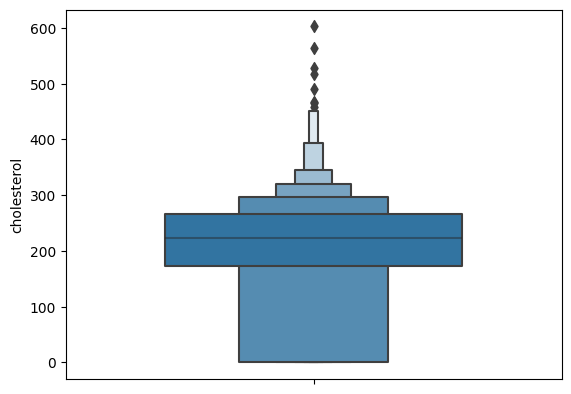

In [6]:
sns.boxenplot(y=data['cholesterol'],width=0.6)

In [7]:
data[data["cholesterol"] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
294,65,1,4,115,0,0,0,93,1,0.0,2,1
295,32,1,1,95,0,1,0,127,0,0.7,1,1
296,61,1,4,105,0,1,0,110,1,1.5,1,1
297,50,1,4,145,0,1,0,139,1,0.7,2,1
298,57,1,4,110,0,1,1,131,1,1.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,43,1,4,122,0,0,0,120,0,0.5,1,1
516,63,1,3,130,0,1,1,160,0,3.0,2,0
519,48,1,3,102,0,1,1,110,1,1.0,3,1
536,56,1,4,130,0,0,2,122,1,1.0,2,1


172 dados possuem cholesterol igual a 0, o que não faz sentido. Desse modo esses dados também serão removidos, como mostrado abaixo.

In [8]:
data = data[data["cholesterol"] != 0]

### Fazendo os últimos ajustes nos dados

In [9]:
data[data["oldpeak"] < 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
513,35,1,3,123,161,0,1,153,0,-0.1,1,0


Analisando alguns outros datasets, o oldpeak possui apenas valor maior do que 0. Desse modo, vou optar esse registro será removido

In [10]:
data = data[data["oldpeak"] >= 0]

In [11]:
data[data["ST slope"] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
517,68,1,3,150,195,1,0,132,0,0.0,0,1


O ST slope apenas pode ter o valor 1, 2 ou 3 no dataset. Desse modo, ele também será removido

In [12]:
data = data[data["ST slope"] != 0]

### Mostrando o número de registros

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  744 non-null    int64  
 1   sex                  744 non-null    int64  
 2   chest pain type      744 non-null    int64  
 3   resting bp s         744 non-null    int64  
 4   cholesterol          744 non-null    int64  
 5   fasting blood sugar  744 non-null    int64  
 6   resting ecg          744 non-null    int64  
 7   max heart rate       744 non-null    int64  
 8   exercise angina      744 non-null    int64  
 9   oldpeak              744 non-null    float64
 10  ST slope             744 non-null    int64  
 11  target               744 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 75.6 KB


Restaram 744 registros não nulos

## Exportando o novo dataset 

In [14]:
data.to_csv('data_processed.csv', index=False)

### Analisando as estatísticas para as colunas com dados contínuos

In [15]:
continuous = ["age","resting bp s","cholesterol","max heart rate","oldpeak"]
name_continuous = ["Idade","Pressão arterial em repouso (mm Hg)", "Colesterol Sérico (mg/dl)", "Máxima frequência cardíaca","OldPeak" ]
categorical = ['sex','chest pain type','fasting blood sugar','resting ecg','exercise angina','ST slope']
name_categorical = ["Sexo","Tipe de dor no peito","Acúcar no sangue em jejum > 120 mg/dl", "Resultados do eletrocardiograma em repouso", "Angina induzida por exercício", "Inclinação do pico no segmento ST"]
name_xlabels = [["Feminino","Masculino"],["Angina típica","Angina Atípica","Dor não anginosa","Assintomática"],["Não","Sim"],["Normal","Anormalidade onda ST-T","Hipertrofia"],["Não","Sim"],["Ascendente","Plana","Descendente"]]

data[continuous].describe().round(2)

,age,resting bp s,cholesterol,max heart rate,oldpeak
count,744.00,744.00,744.00,744.00,744.00
mean,52.89,133.01,244.81,140.22,0.90
std,9.48,17.29,59.13,24.55,1.07
min,28.00,92.00,85.00,69.00,0.00
25%,46.00,120.00,208.00,122.00,0.00
50%,54.00,130.00,237.00,140.00,0.50
75%,59.00,140.00,275.00,160.00,1.50
max,77.00,200.00,603.00,202.00,6.20


Os dados parecem estar de acordo com os valores esperados para cada um, não sendo necessário fazer nenhuma alteração nos dados nessa etapa

## Dados contínuos

### Boxen plots para os dados contínuos

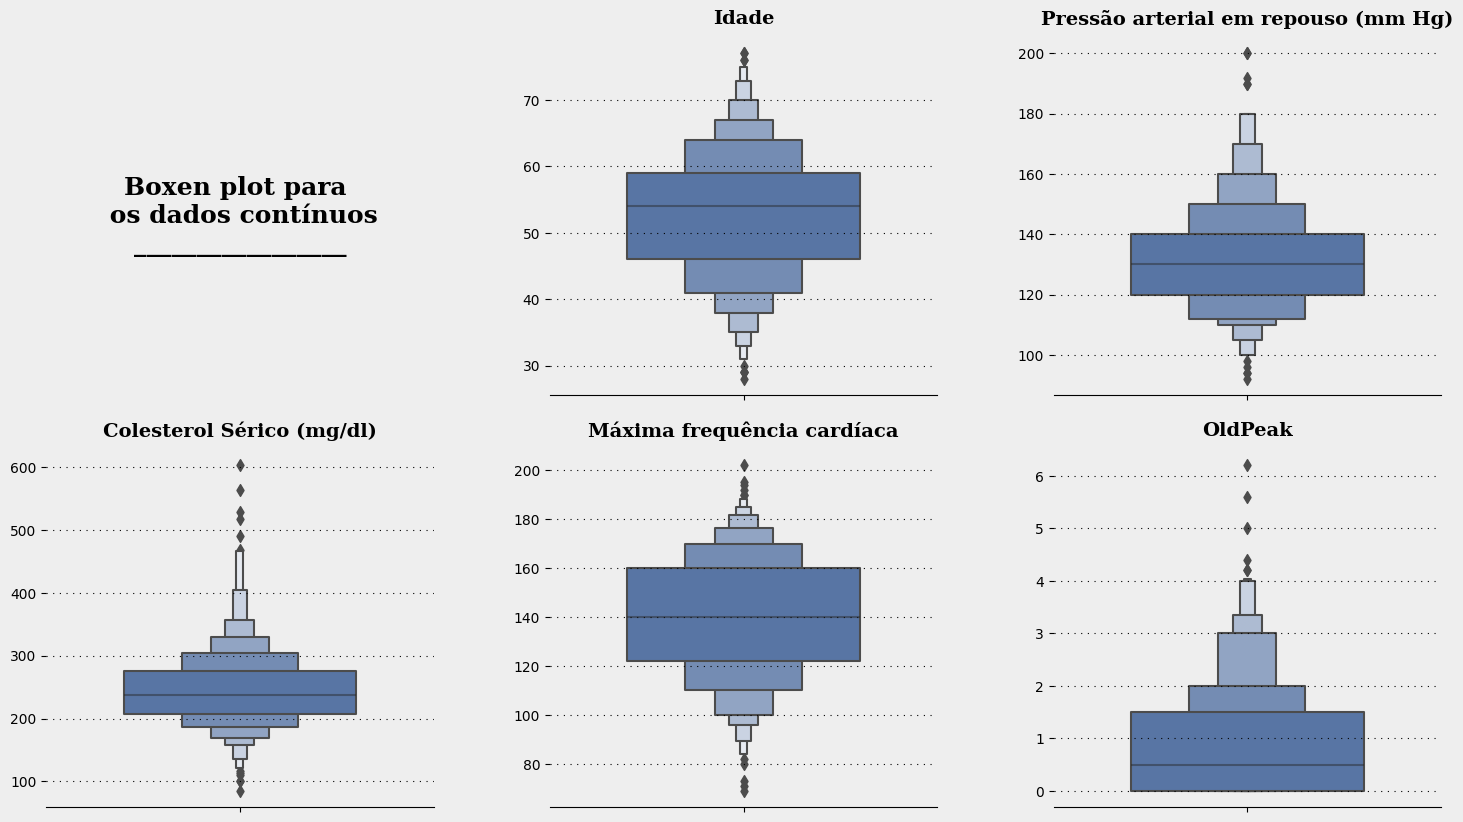

In [16]:
sns.set_palette("deep")
fig = plt.figure(figsize=(18,10))
grid_location = fig.add_gridspec(2,3)
grid_location.update(wspace=0.3, hspace=0.15)
background_color = "#eeeeee"
fig.patch.set_facecolor(background_color) 

ax = []

for i in range(len(continuous) + 1):
    if(i < 3):
        ax.append(fig.add_subplot(grid_location[0,i]))
    else:
        ax.append(fig.add_subplot(grid_location[1,i-3]))
    ax[i].set_facecolor(background_color) 
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)

# Title of the plot
ax[0].tick_params(left=False, bottom=False)
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].text(0.5,0.5,
         'Boxen plot para \n os dados contínuos\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Boxen plots 
for i in range(1,len(continuous) + 1):
    ax[i].text(0.5, 1.05, name_continuous[i-1], fontsize=14, fontweight='bold', fontfamily='serif', color="#000000",
               horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes)
    ax[i].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.boxenplot(ax=ax[i],y=data[continuous[i-1]],width=0.6)
    ax[i].set_ylabel("")
    ax[i].spines["bottom"].set_visible(True)

### Boxen plots para os dados contínuos de acordo com o output

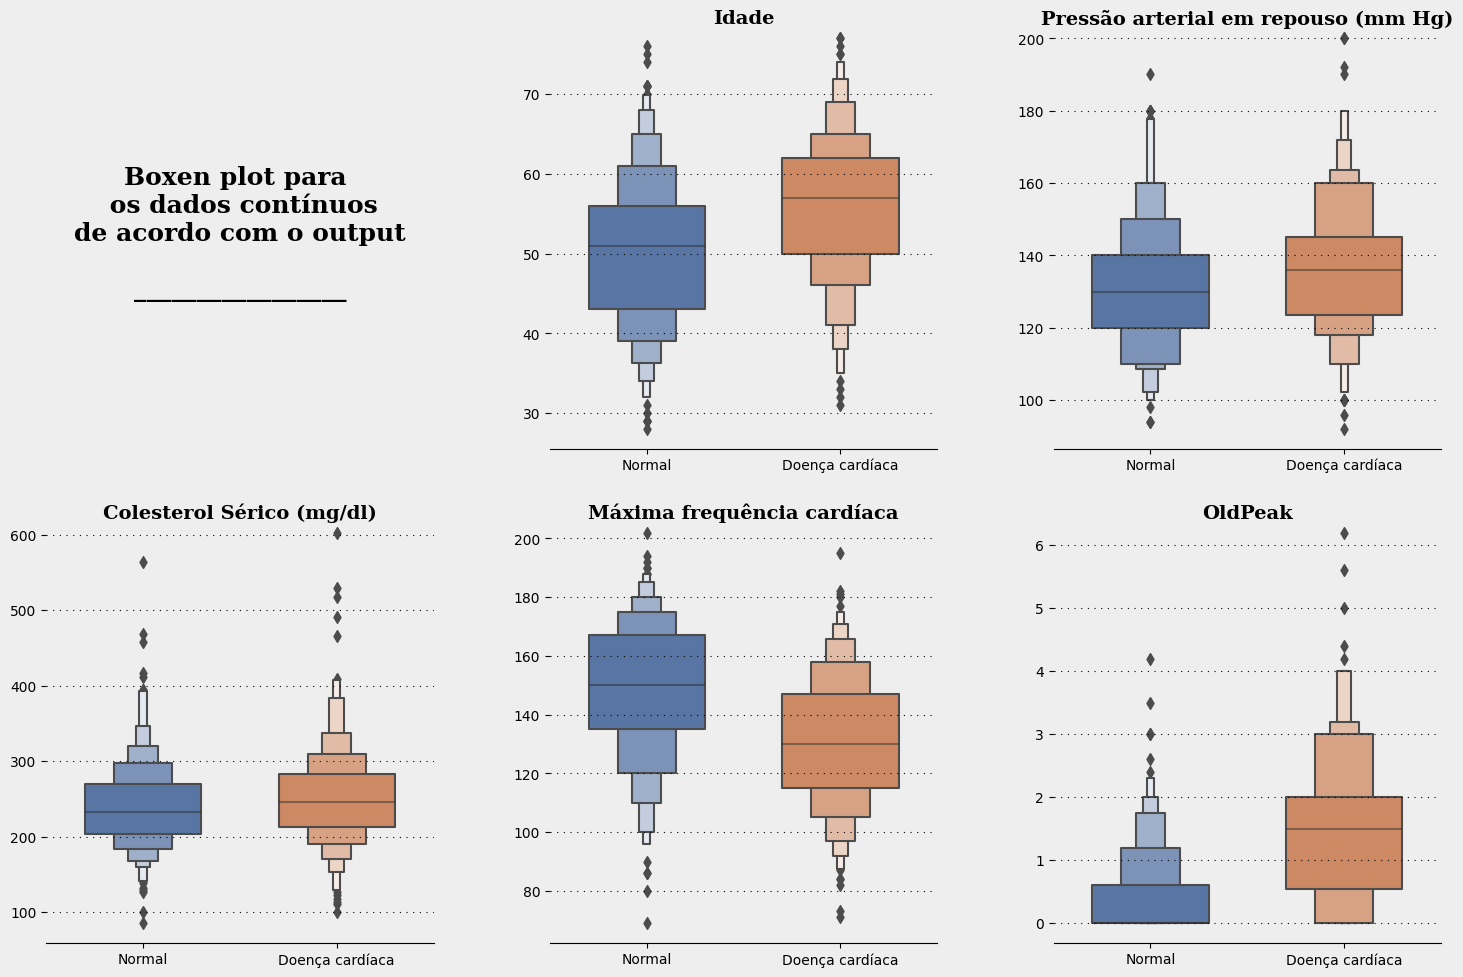

In [17]:
fig = plt.figure(figsize=(18,12))
grid_location = fig.add_gridspec(2,3)
grid_location.update(wspace=0.3, hspace=0.15)
background_color = "#eeeeee"
fig.patch.set_facecolor(background_color) 

ax = []

for i in range(len(continuous) + 1):
    if(i < 3):
        ax.append(fig.add_subplot(grid_location[0,i]))
    else:
        ax.append(fig.add_subplot(grid_location[1,i-3]))
    ax[i].set_facecolor(background_color) 
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)

# Title of the plot
ax[0].tick_params(left=False, bottom=False)
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].text(0.5,0.5,
         'Boxen plot para \n os dados contínuos\n'
         +'de acordo com o output\n\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Boxen plots 
for i in range(1,len(continuous) + 1):
    ax[i].text(0.5, 1, name_continuous[i-1], fontsize=14, fontweight='bold', fontfamily='serif', color="#000000",
               horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes)
    ax[i].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.boxenplot(ax=ax[i],y=data[continuous[i-1]],x=data['target'],width=0.6)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].set(xticklabels=["Normal","Doença cardíaca"])
    ax[i].spines["bottom"].set_visible(True)

<ul>
    <li>Pessoas com mais idade tem maior probabilidade de ter uma doença cardíaca</li>
</ul>

### Distribuição dos dados de acordo com o output

#### Função para gerar os gráficos

In [18]:
def plot_kde(title,name_feature):
    fig = plt.figure(figsize=(8,6))
    background_color = "#eeeeee"
    fig.patch.set_facecolor(background_color) 
    ax = sns.kdeplot(data=data,x=name_feature,hue='target')
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax.set_facecolor(background_color) 
    ax.set_xlabel("")
    ax.set_title(title,fontsize=14)
    plt.legend(title="",labels=["Doença cardíaca","Normal"])

#### Idade

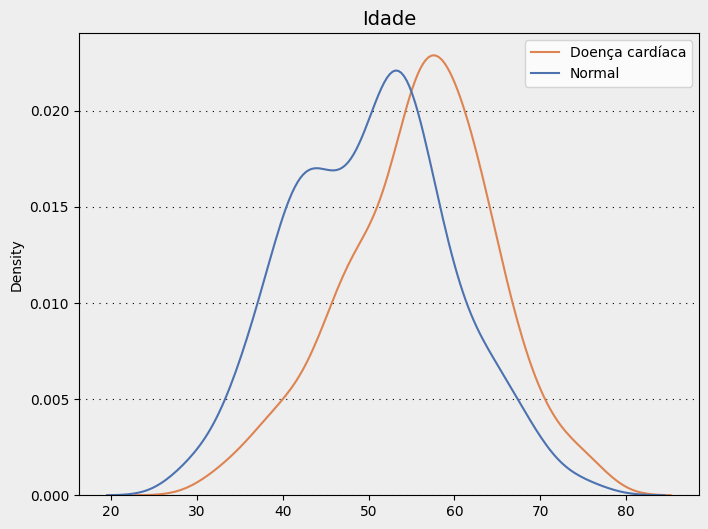

In [19]:
plot_kde("Idade",'age')

#### Pressão arterial em repouso (mm Hg)

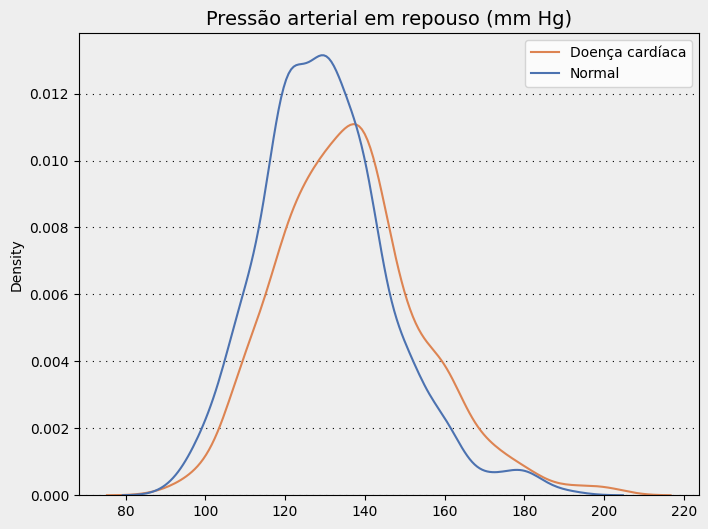

In [20]:
plot_kde("Pressão arterial em repouso (mm Hg)",continuous[1])

#### Colesterol (mg/dl)

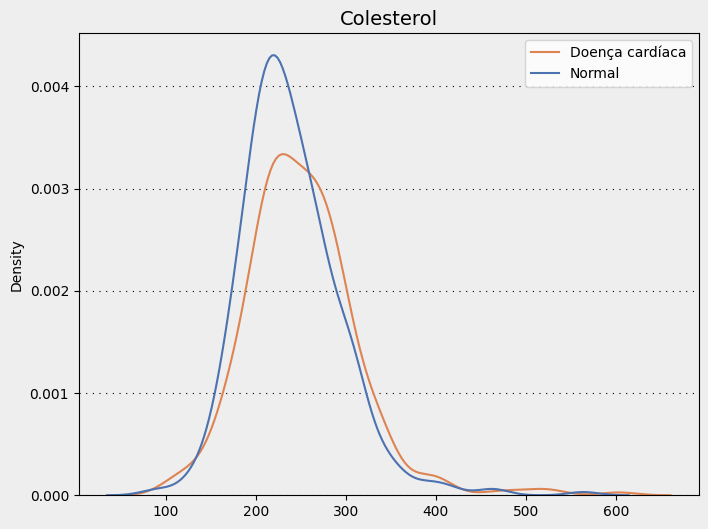

In [21]:
plot_kde("Colesterol",continuous[2])

#### Máxima frequência cardíaca

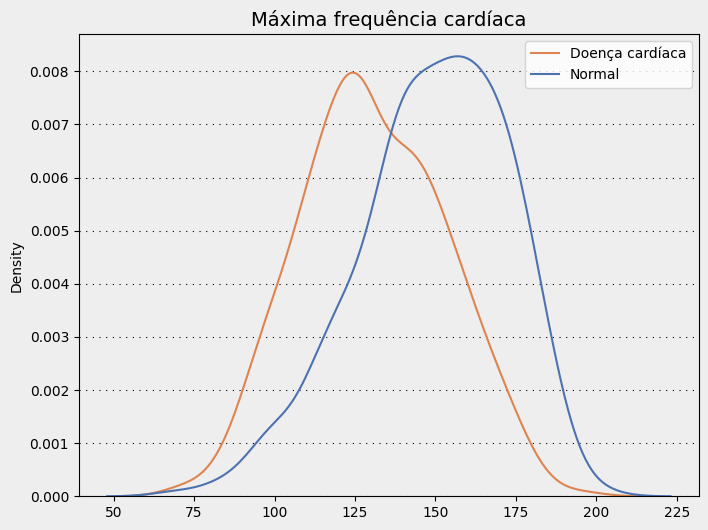

In [22]:
plot_kde("Máxima frequência cardíaca",continuous[3])

#### Depressão ST induzida por exercício em relação ao repouso

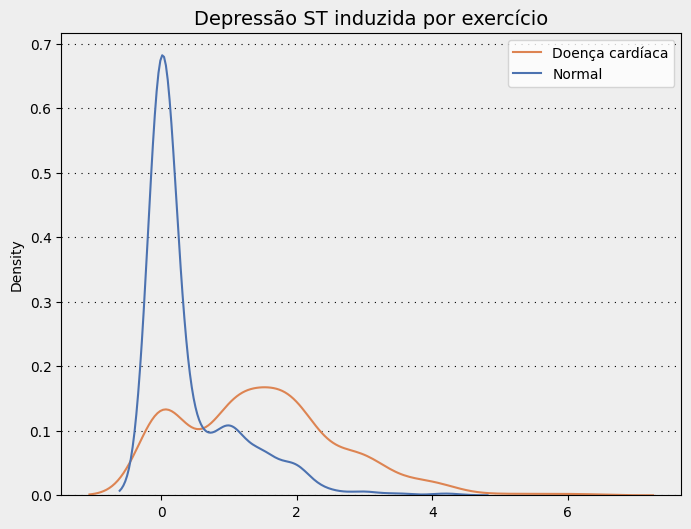

In [23]:
plot_kde("Depressão ST induzida por exercício",continuous[4])

## Dados Categóricos

### Gráfico de colunas para os dados categóricos

Text(0.5, 0.98, 'Gráfico de colunas para os dados categóricos')

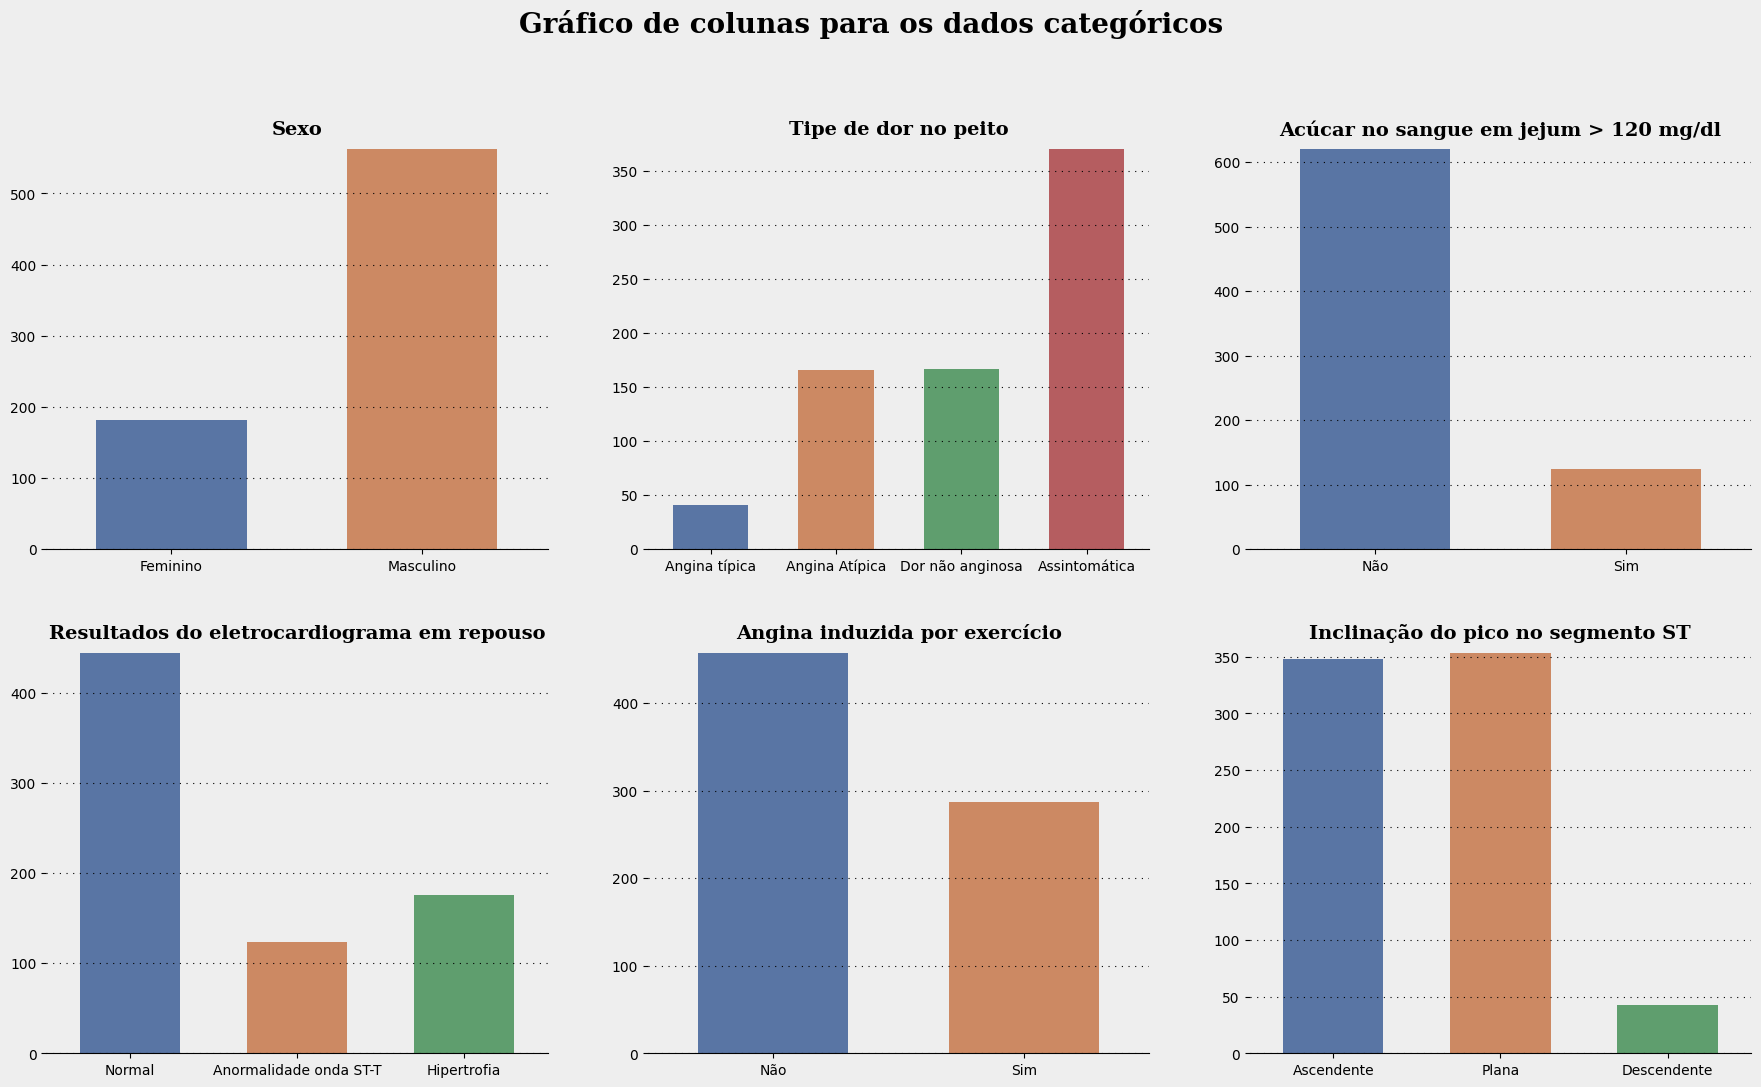

In [24]:
fig = plt.figure(figsize=(22,12))
grid_location = fig.add_gridspec(2,3)
background_color = "#eeeeee"
fig.patch.set_facecolor(background_color) 

ax = []

for i in range(2):
    for j in range(3):
        ax.append(fig.add_subplot(grid_location[i,j]))

for i in range(len(categorical)):
    ax[i].set_facecolor(background_color) 
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)

# Boxen plots 
for i in range(len(categorical)):
    ax[i].text(0.5, 1, name_categorical[i], fontsize=14, fontweight='bold', fontfamily='serif', color="#000000",
               horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes)
    ax[i].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.countplot(ax=ax[i],x=data[categorical[i]],width=0.6)
    ax[i].set_ylabel("")
    ax[i].set(xticklabels=name_xlabels[i])
    ax[i].set_xlabel("")
    ax[i].spines["bottom"].set_visible(True)

fig.suptitle('Gráfico de colunas para os dados categóricos', fontsize=20, fontweight='bold',fontfamily='serif', color="#000000")

### Gráfico de colunas para os dados categóricos de acordo com o output

Text(0.5, 0.98, 'Gráfico de colunas para os dados categóricos')

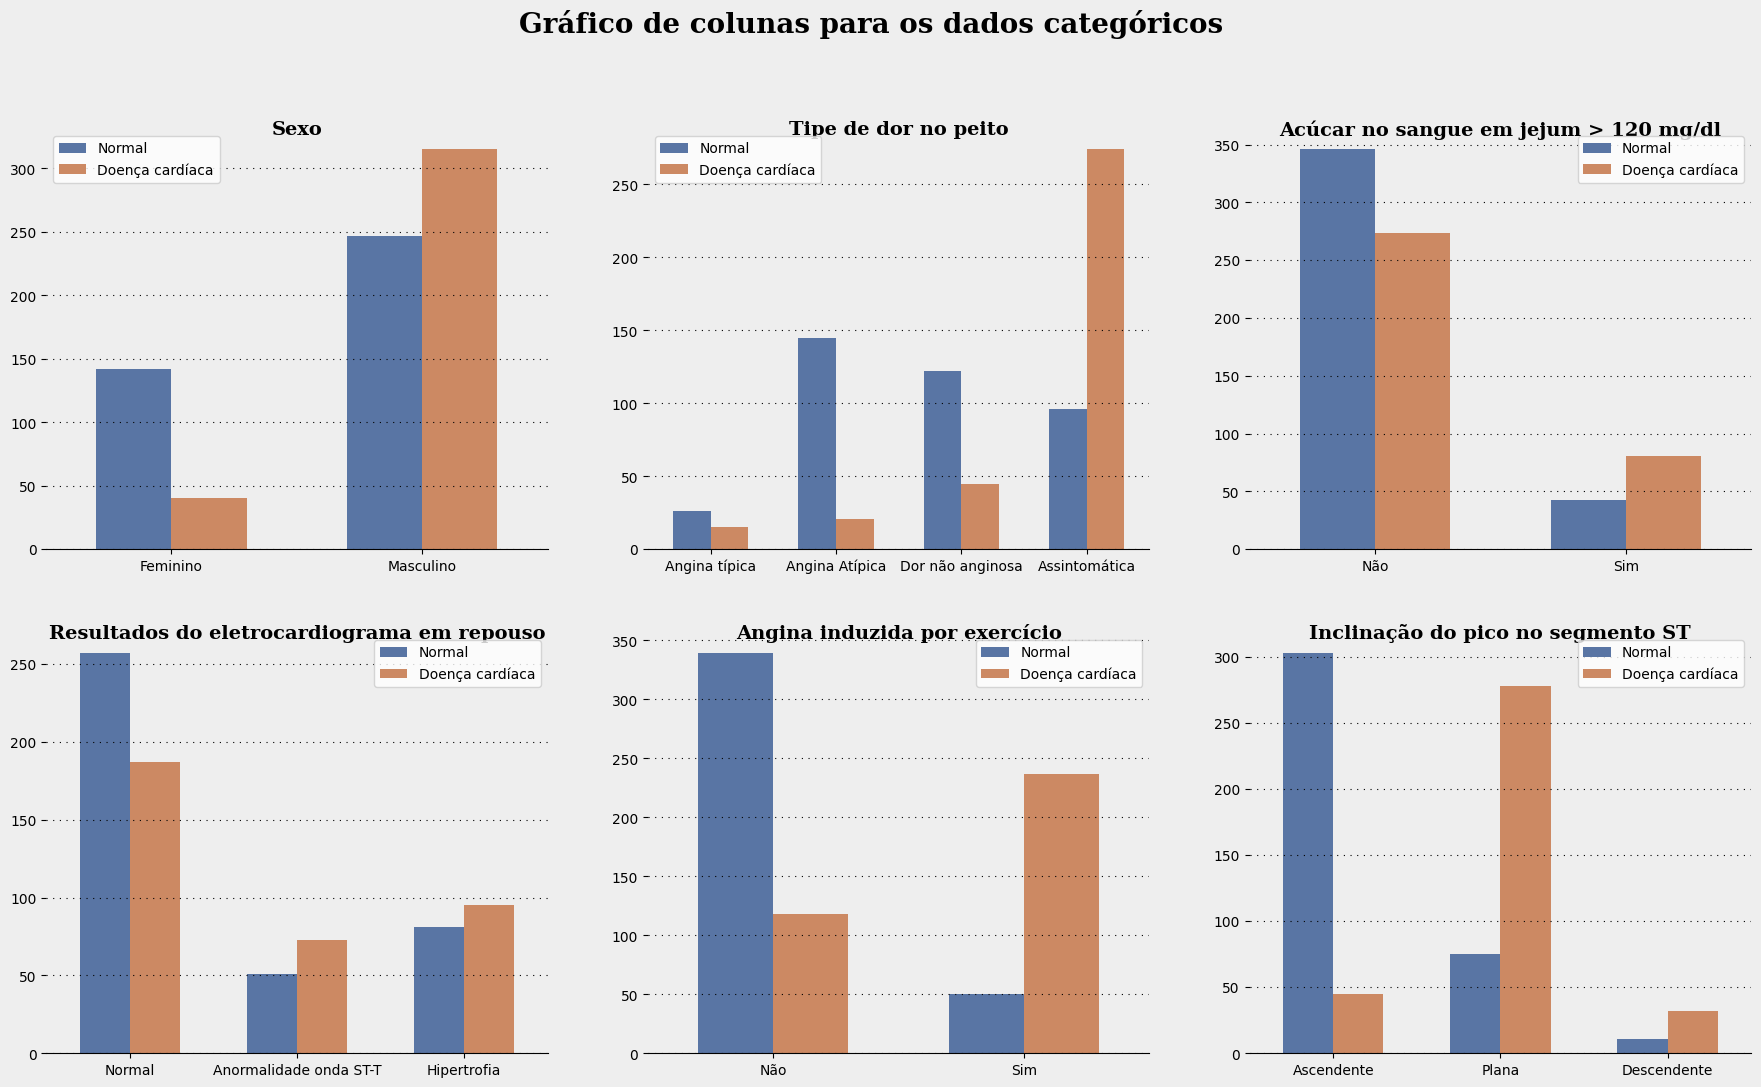

In [25]:
fig = plt.figure(figsize=(22,12))
grid_location = fig.add_gridspec(2,3)
background_color = "#eeeeee"
fig.patch.set_facecolor(background_color) 

ax = []

for i in range(2):
    for j in range(3):
        ax.append(fig.add_subplot(grid_location[i,j]))

for i in range(len(categorical)):
    ax[i].set_facecolor(background_color) 
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)

# Boxen plots 
for i in range(len(categorical)):
    ax[i].text(0.5, 1, name_categorical[i], fontsize=14, fontweight='bold', fontfamily='serif', color="#000000",
               horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes)
    ax[i].grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.countplot(ax=ax[i],x=data[categorical[i]], hue = data["target"], width=0.6)
    ax[i].set(xticklabels=name_xlabels[i])
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].spines["bottom"].set_visible(True)
    ax[i].legend(title="",labels=["Normal","Doença cardíaca"])

fig.suptitle('Gráfico de colunas para os dados categóricos', fontsize=20, fontweight='bold',fontfamily='serif', color="#000000")

### Analisando os dados categóricos de acordo com o output

#### Função para gerar os gráficos da barras

In [26]:
def plot_cat_feature(title,name_feature,x_labels):
    fig = plt.figure(figsize=(8,6))
    background_color = "#eeeeee"
    fig.patch.set_facecolor(background_color) 

    ax = sns.countplot(x=data[name_feature],hue=data["target"])
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax.set_facecolor(background_color) 
    ax.set_ylabel("Quantidade")
    ax.set_xlabel("")
    ax.set(xticklabels=x_labels)
    ax.set_title(title,fontsize=14)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.legend(title="",labels=["Normal","Doença cardíaca"])

#### Sexo

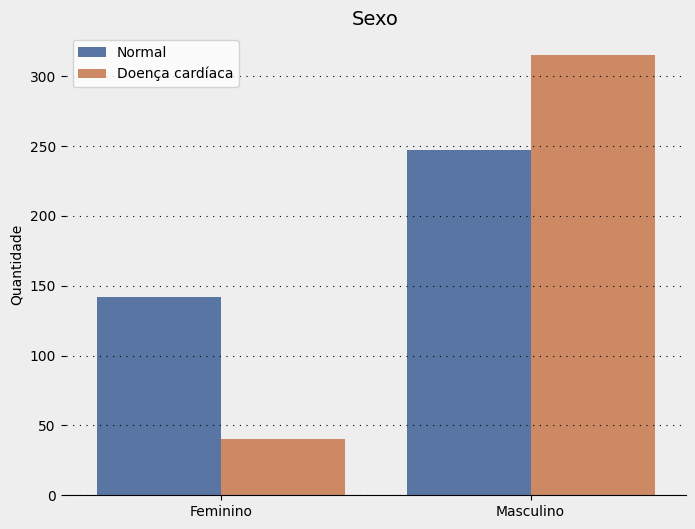

In [27]:
plot_cat_feature("Sexo","sex",["Feminino","Masculino"])

<ul>
    <li>As pessoas de sexo masculino tem maior probabilidade de ter ataque cardíaco</li>
</ul>

#### Tipo de dor no peito

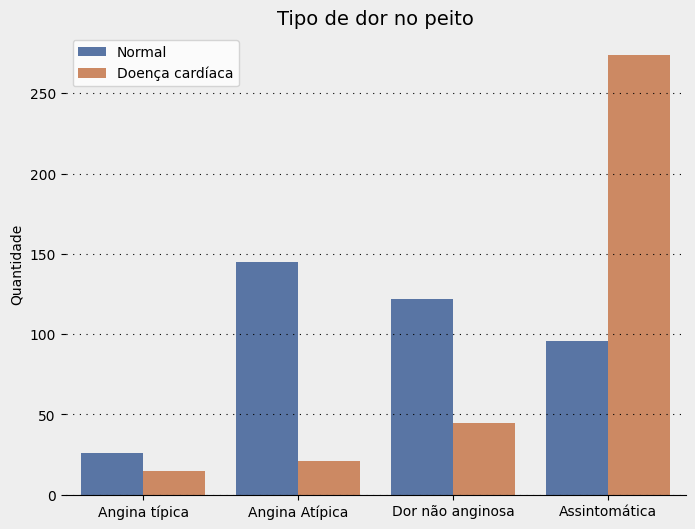

In [28]:
plot_cat_feature("Tipo de dor no peito",categorical[1],["Angina típica","Angina Atípica","Dor não anginosa","Assintomática"])

<ul>
    <li>As pessoas assintomáticas tem maior probabilidade de ter alguma doença cardíaca</li>
</ul>

#### Acúcar no sangue em jejum > 120 mg/dl

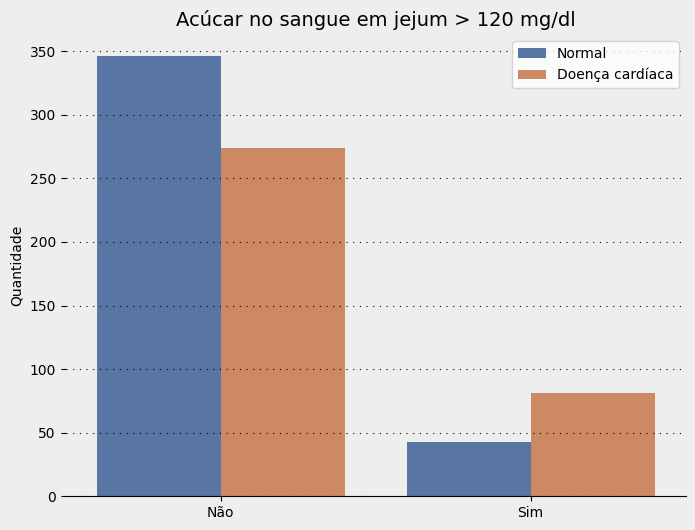

In [29]:
plot_cat_feature("Acúcar no sangue em jejum > 120 mg/dl","fasting blood sugar",["Não","Sim"])

<ul>
    <li>Pessoas que possuem diabetes tem uma probabilidade maior de ter uma doença cardíaca</li>
</ul>

#### Resultados de eletrocardiografia em repouso

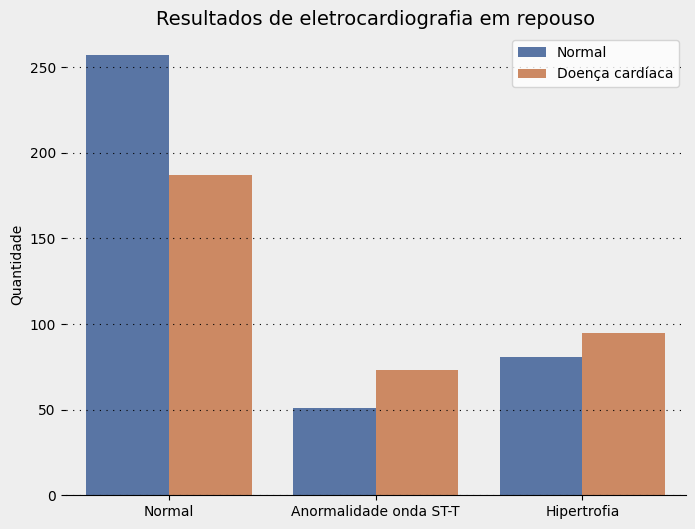

In [30]:
plot_cat_feature("Resultados de eletrocardiografia em repouso","resting ecg",["Normal","Anormalidade onda ST-T","Hipertrofia"])

<ul>
    <li>Pessoas que no resultado do eletrocardiogama apresentam anormalidade na onda ST-T ou hipertrofia tem uma probabilidade maior de ter uma doença cardíaca</li>
</ul>

#### Angina induzida por exercício

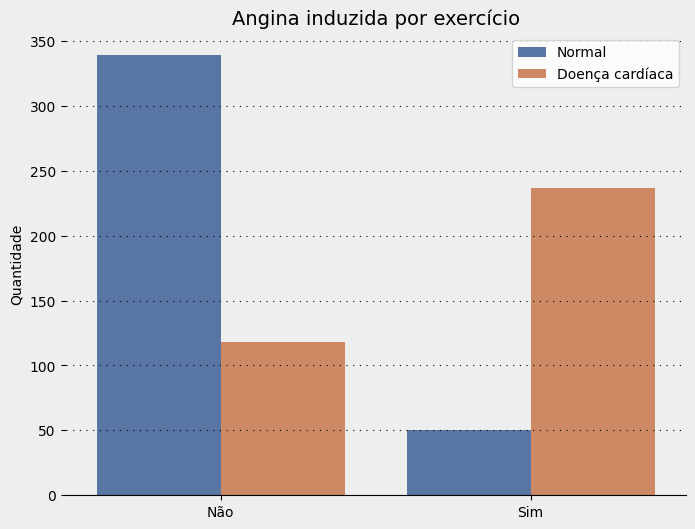

In [31]:
plot_cat_feature("Angina induzida por exercício","exercise angina",["Não","Sim"])

<ul>
    <li>Pessoas que tem angina induzida por exercício tem uma probabilidade maior de ter uma doença cardíaca</li>
</ul>

#### Inclinação do pico do segmento ST do exercício

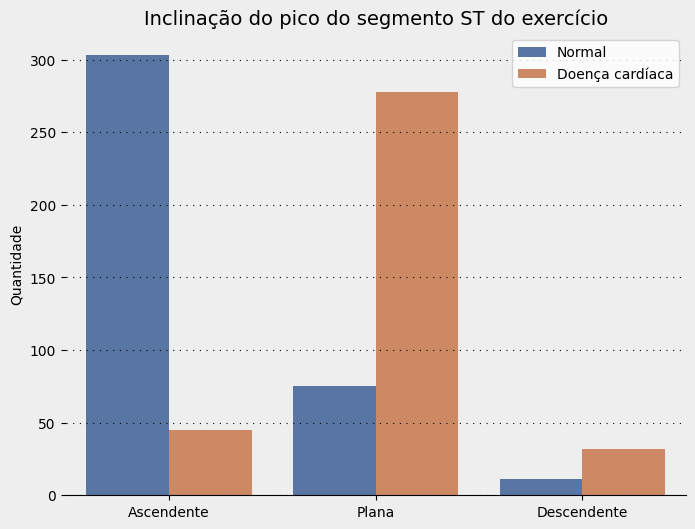

In [32]:
plot_cat_feature("Inclinação do pico do segmento ST do exercício","ST slope",["Ascendente","Plana","Descendente"])

<ul>
    <li>Pessoas que apresentam uma inclinação plana ou descendente no segmento ST do exercício tem uma probabilidade maior de ter uma doença cardíaca</li>
</ul>

### Output

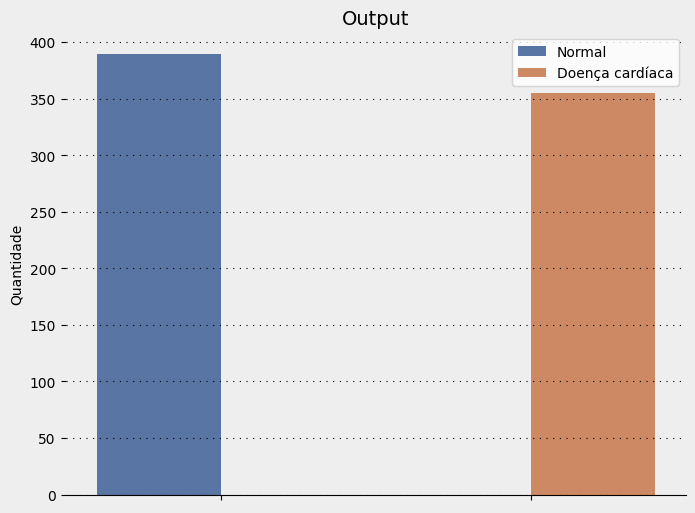

In [33]:
plot_cat_feature("Output","target",[])

## Correlação dos dados

Text(0.5, 1.0, 'Correlação entre as features')

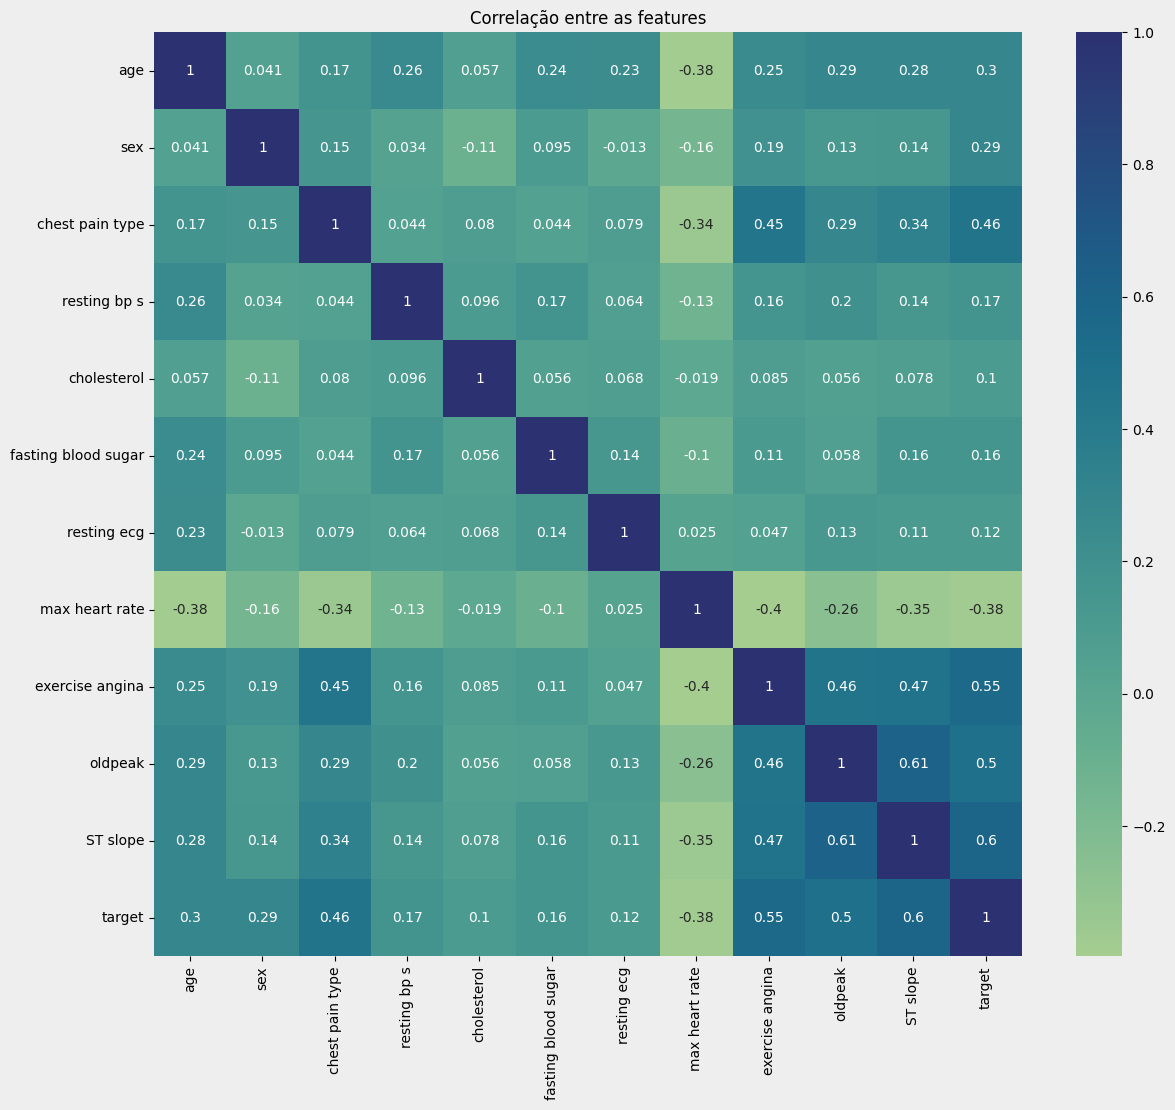

In [34]:
fig = plt.figure(figsize=(14,12))
background_color = "#eeeeee"
fig.patch.set_facecolor(background_color) 
ax = sns.heatmap(data.corr(),annot=True, cmap="crest")
ax.set_facecolor(background_color)
ax.set_title("Correlação entre as features")

<ul>
    <li>Dados que apresentam uma correlação, em módulo, maior que 0.4 com o output: "Chest pain type","Exercise Angina","Oldpeak","ST slope"</li>
    <li>Dados que apresentam uma correlação com o output, em módulo, entre 0.2 e 0.4: "Age","Sex","Max Heart Rate"</li>
    <li>Dados que apresentam uma correlação, em módulo, menor que 0.2 com o output: "Resting bps","Cholesterol","Fasting blood sugar","resting ecg"</li>
</ul>

# Classificação utilizando diferentes modelos

## Importando bibliotecas

In [35]:
# Preprocessing
from sklearn.preprocessing import Normalizer

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score

#Cross Validation
from sklearn.model_selection import GridSearchCV

## Modelos com os dados sem pré-processamento

In [36]:
data_aux = data
target_feature = "target"
X = data_aux.drop([target_feature],axis=1)
y = data_aux[[target_feature]]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=0)

logreg = LogisticRegression(random_state=0).fit(X_train, y_train.values.ravel())
y_pred = logreg.predict(X_test)
print("Regressão logística - Acurácia", accuracy_score(y_test, y_pred).round(4))
svc = SVC(random_state=0).fit(X_train, y_train.values.ravel())
y_pred = svc.predict(X_test)
print("SVM - Acurácia", accuracy_score(y_test, y_pred).round(4))
dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train.values.ravel())
y_pred = dt.predict(X_test)
print("Árvore de decisão - Acurácia", accuracy_score(y_test, y_pred).round(4))
knn = KNeighborsClassifier().fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
print("KNN - Acurácia", accuracy_score(y_test, y_pred).round(4))
rand_forest = RandomForestClassifier(random_state=0).fit(X_train, y_train.values.ravel())
y_pred = rand_forest.predict(X_test)
print("Random forest - Acurácia", accuracy_score(y_test, y_pred).round(4))

C:\Users\Rafael\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regressão logística - Acurácia 0.8456
SVM - Acurácia 0.7114
Árvore de decisão - Acurácia 0.7987
KNN - Acurácia 0.6913
Random forest - Acurácia 0.906


### Ajustando as features categóricas e contínuas

In [37]:
data_aux = data

# Convert categorical columns into dummy/indicator variables
data_aux = pd.get_dummies(data_aux, columns = categorical, drop_first = True)

target_feature = "target"

# Features dataframe
X = data_aux.drop([target_feature],axis=1)

# Target dataframe
y = data_aux[[target_feature]]

# Using scaler in continuous features
scaler = Normalizer()
X[continuous] = scaler.fit_transform(X[continuous])
X.head()

,age,resting bp s,cholesterol,max heart rate,oldpeak,sex_1,chest pain type_2,chest pain type_3,chest pain type_4,fasting blood sugar_1,resting ecg_1,resting ecg_2,exercise angina_1,ST slope_2,ST slope_3
0,0.109148,0.382016,0.788591,0.469334,0.000000,1,1,0,0,0,0,0,0,0,0
1,0.168328,0.549643,0.618349,0.535902,0.003435,0,0,1,0,0,0,0,0,1,0
2,0.112607,0.395647,0.861293,0.298257,0.000000,1,1,0,0,0,1,0,0,0,0
3,0.170982,0.491573,0.762294,0.384709,0.005343,0,0,0,1,0,0,0,1,1,0
4,0.192949,0.535971,0.696762,0.435923,0.000000,1,0,1,0,0,0,0,0,0,0


### Split em dados de treino e teste

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=0)

## Função para gerar a matiz de confusão

In [39]:
def plot_confusion_matrix(y_test,y_pred, name_model):
    fig = plt.figure(figsize=(6,4))
    background_color = "#eeeeee"
    fig.patch.set_facecolor(background_color) 
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, cmap="crest")
    ax.set_facecolor(background_color)
    ax.set(xticklabels=["Normal","Doença cardíaca"])
    ax.set(yticklabels=["Normal","Doença cardíaca"])
    ax.set_title("Matriz de confusão: " + name_model)

## Testes iniciais na criação dos modelos

In [40]:
logreg = LogisticRegression(random_state=0).fit(X_train, y_train.values.ravel())
y_pred = logreg.predict(X_test)
print("Regressão logística - Acurácia", accuracy_score(y_test, y_pred).round(4))
svc = SVC(random_state=0).fit(X_train, y_train.values.ravel())
y_pred = svc.predict(X_test)
print("SVM - Acurácia", accuracy_score(y_test, y_pred).round(4))
dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train.values.ravel())
y_pred = dt.predict(X_test)
print("Árvore de decisão - Acurácia", accuracy_score(y_test, y_pred).round(4))
knn = KNeighborsClassifier().fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
print("KNN - Acurácia", accuracy_score(y_test, y_pred).round(4))
rand_forest = RandomForestClassifier(random_state=0).fit(X_train, y_train.values.ravel())
y_pred = rand_forest.predict(X_test)
print("Random forest - Acurácia", accuracy_score(y_test, y_pred).round(4))

Regressão logística - Acurácia 0.8993
SVM - Acurácia 0.906
Árvore de decisão - Acurácia 0.8926
KNN - Acurácia 0.8859
Random forest - Acurácia 0.8993


## Modelos

### Função para realizar o treino dos modelos

In [41]:
def trainModel(model, parameters, X_train, y_train, X_test, y_test, name):

    grid_searcher = GridSearchCV(model, parameters, scoring= 'recall_micro')

    # fitting the object
    grid_searcher.fit(X_train, y_train.values.ravel())

    print("-------", name, "-------")

    # the scores
    print("O(s) melhore(s) parâmetro(s) encontrado(s):", grid_searcher.best_params_)

    # predicting the values
    y_pred = grid_searcher.predict(X_test)

    # printing the test accuracy
    print("A acurácia, para os melhores parâmetros, nos dados de teste foi de:", 
        accuracy_score(y_test, y_pred))
    
    print("O recall, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de:",recall_score(y_test, y_pred, average=None).round(2))
    print("A precisão, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de:",precision_score(y_test, y_pred, average=None).round(2))

    plot_confusion_matrix(y_test,y_pred, name)

### Regressão logística

------- Regressão Logística -------
O(s) melhore(s) parâmetro(s) encontrado(s): {'C': 0.25}
A acurácia, para os melhores parâmetros, nos dados de teste foi de: 0.912751677852349
O recall, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.95 0.87]
A precisão, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.89 0.94]


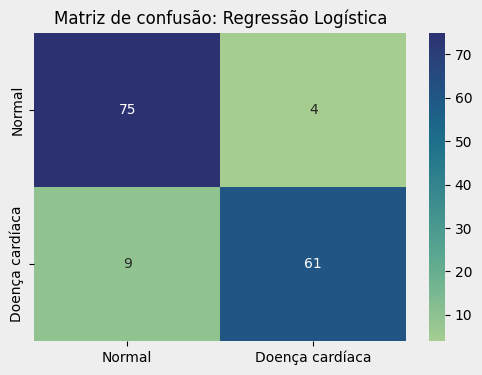

In [42]:
logreg = LogisticRegression()
parameters = {"C": [0.1, 0.25, 0.5, 0.75, 1, 2, 5, 10]}
trainModel(logreg, parameters, X_train, y_train, X_test, y_test, "Regressão Logística")

### Support Vector Machine

------- SVC -------
O(s) melhore(s) parâmetro(s) encontrado(s): {'C': 5, 'gamma': 0.005}
A acurácia, para os melhores parâmetros, nos dados de teste foi de: 0.9060402684563759
O recall, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.92 0.89]
A precisão, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.9  0.91]


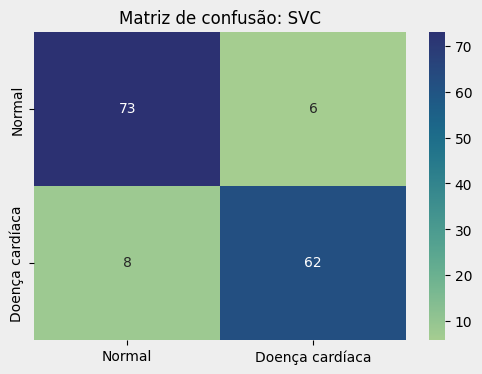

In [43]:
svm = SVC(random_state=0)
parameters = {"C": [0.1,0.5,1,5,10],
              'gamma':[0.005,0.01,0.05,0.1,0.5,1,5]}
trainModel(svm, parameters, X_train, y_train, X_test, y_test, "SVC")

### Árvore de decisão

------- Árvore de decisão -------
O(s) melhore(s) parâmetro(s) encontrado(s): {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
A acurácia, para os melhores parâmetros, nos dados de teste foi de: 0.8993288590604027
O recall, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.94 0.86]
A precisão, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.88 0.92]


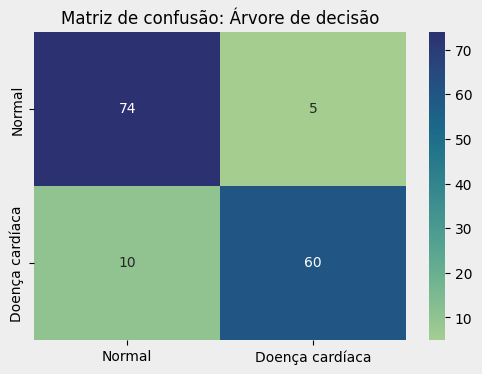

In [44]:
dt = DecisionTreeClassifier(random_state=0)
parameters = {'criterion': ['gini','entropy'],
                'splitter' :['best'],
              'max_depth': [2,3,4,5,6,8,10,15]}
trainModel(dt, parameters, X_train, y_train, X_test, y_test, "Árvore de decisão")

### K-nearest Neighbors classifier

------- KNN -------
O(s) melhore(s) parâmetro(s) encontrado(s): {'n_neighbors': 7}
A acurácia, para os melhores parâmetros, nos dados de teste foi de: 0.8926174496644296
O recall, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.9  0.89]
A precisão, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.9  0.89]


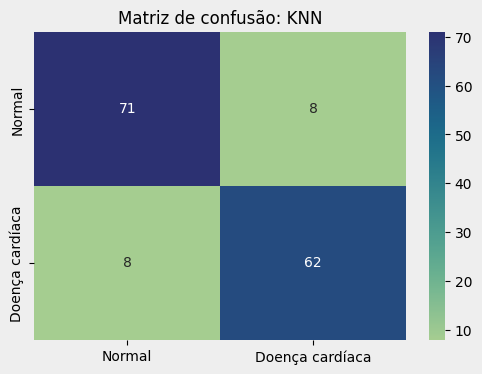

In [45]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[3,4,7,11,19]}
trainModel(knn, parameters, X_train, y_train, X_test, y_test, "KNN")

### Random forest

------- Floresta Aleatória -------
O(s) melhore(s) parâmetro(s) encontrado(s): {'max_features': None, 'n_estimators': 300}
A acurácia, para os melhores parâmetros, nos dados de teste foi de: 0.9194630872483222
O recall, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.95 0.89]
A precisão, considerando as pessoas sem a doença e com doença cardíaca, respectivamente, foi de: [0.9  0.94]


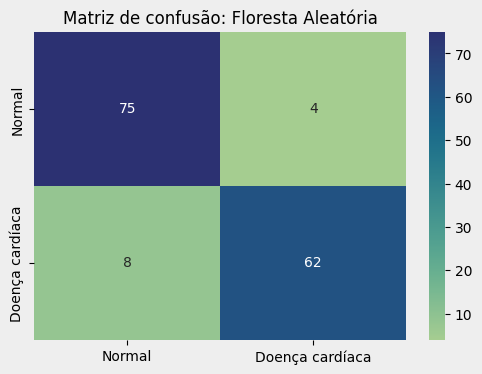

In [46]:
randforest = RandomForestClassifier(random_state=0)
parameters = {"n_estimators": [10,100,200,300],
             'max_features': ['sqrt', None]}
trainModel(randforest, parameters, X_train, y_train, X_test, y_test, "Floresta Aleatória")

## Criando uma única imagem com todas as matrizes de confusão

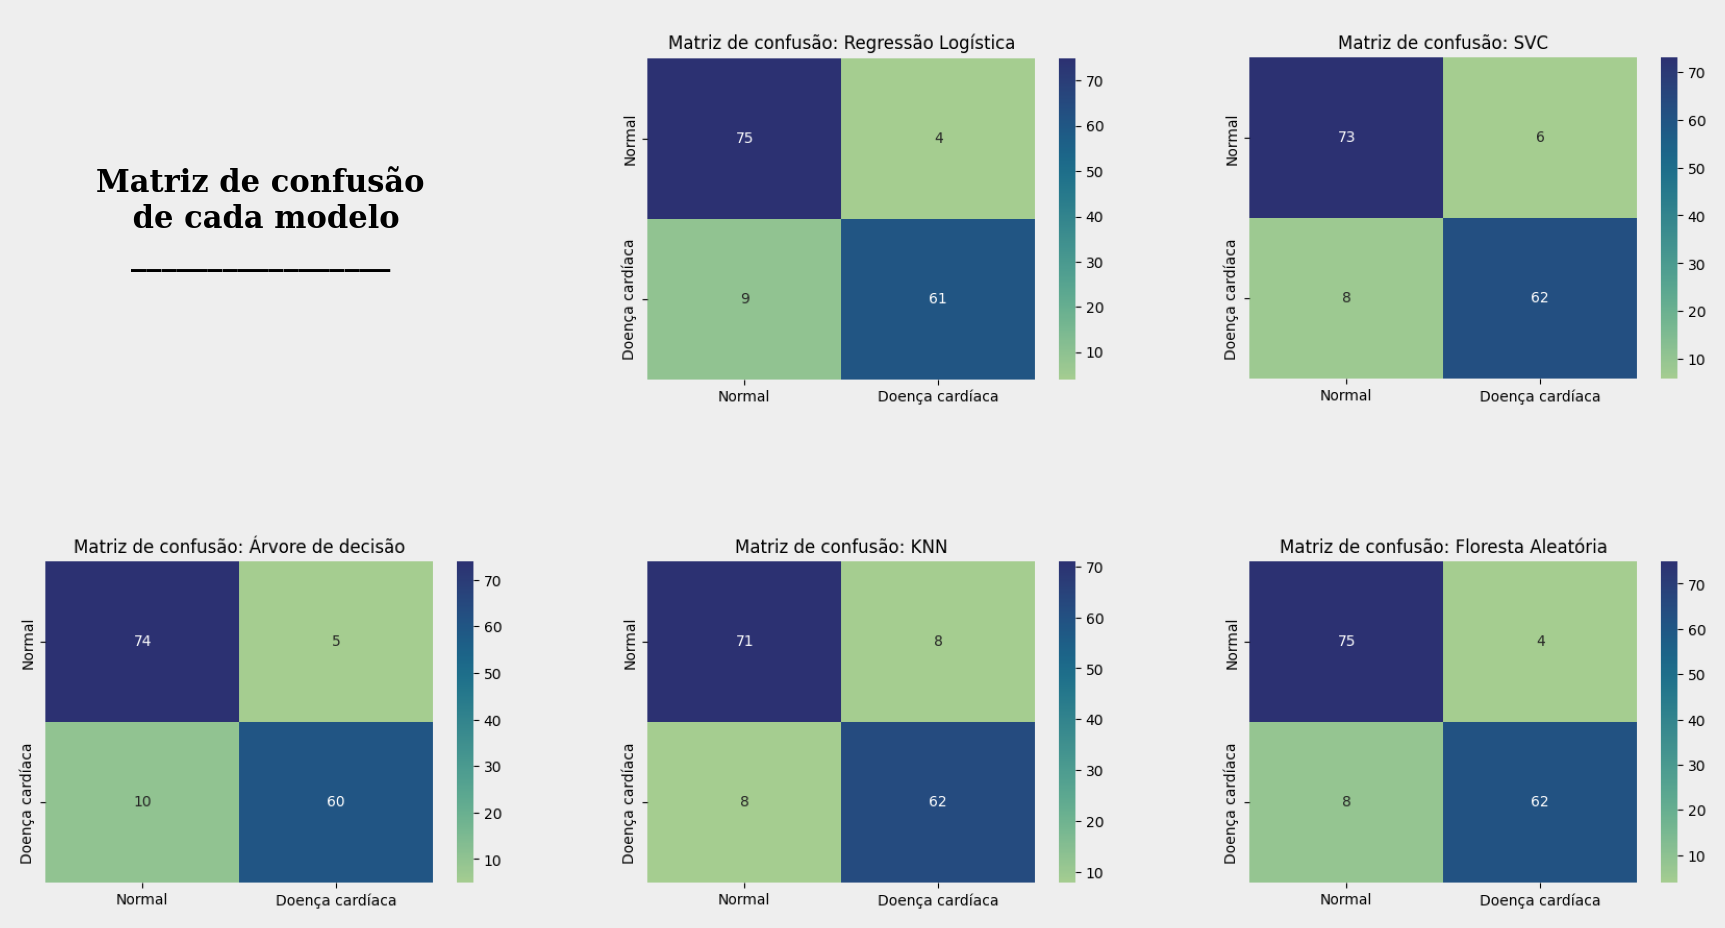

In [47]:
from PIL import Image

image_datas = []
image_datas.append(Image.open("img/reg_log.png"))
image_datas.append(Image.open("img/svc.png"))
image_datas.append(Image.open("img/dt.png"))
image_datas.append(Image.open("img/knn.png"))
image_datas.append(Image.open("img/rand_forest.png"))


fig = plt.figure(figsize=(22,12))
grid_location = fig.add_gridspec(2,3)
background_color = "#eeeeee"
fig.patch.set_facecolor(background_color) 

ax = []

for i in range(2):
    for j in range(3):
        ax.append(fig.add_subplot(grid_location[i,j]))

ax[0].set_facecolor(background_color) 
ax[0].spines["bottom"].set_visible(False)
ax[0].spines["left"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].tick_params(left=False, bottom=False)
ax[0].text(0.5,0.5,
         'Matriz de confusão\n de cada modelo\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=22, fontweight='bold',
         fontfamily='serif',
         color="#000000")

for i in range(1,6):
    ax[i].tick_params(left=False, bottom=False)
    ax[i].set_facecolor(background_color) 
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].imshow(image_datas[i-1])

## Exportando o modelo

In [48]:
import pickle

randforest = RandomForestClassifier(random_state=0, max_features='sqrt',n_estimators=300)
randforest.fit(X_train, y_train.values.ravel())

pickle.dump(randforest, open('model.pkl', 'wb'))